In [1]:
import pandas as pd
import pandas_gbq as gbq 
from datetime import datetime, timedelta
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
us_aid_df = pd.read_csv('../temp/us_foreign_aid_complete.csv')

/var/folders/0n/nzb139d17cdcpxbqm8n0fyp40000gn/T/ipykernel_33052/525192853.py:1: DtypeWarning: Columns (6,7,12,48) have mixed types. Specify dtype option on import or set low_memory=False.
  us_aid_df = pd.read_csv('../temp/us_foreign_aid_complete.csv')


In [3]:
us_aid_df['Fiscal Year'] = us_aid_df['Fiscal Year'].astype(str)
us_aid_df['Fiscal Year'] = us_aid_df['Fiscal Year'].str[0:4]
us_aid_df['Fiscal Year'] = us_aid_df['Fiscal Year'].astype(int)
us_aid_df['Year'] = us_aid_df['Fiscal Year']
us_aid_df = us_aid_df.drop(columns=['Fiscal Year'])
us_aid_df.head()

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Transaction Type ID,Transaction Type Name,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_id,aid_type_name,activity_budget_amount,submission_activity_id,Year
0,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,2,Obligations,01MAR2006,37760,52794,13,Technical Cooperation - Other,.,30831,2006
1,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,01MAR2006,983,1374,13,Technical Cooperation - Other,.,30831,2006
2,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,01MAY2006,3392,4742,13,Technical Cooperation - Other,.,30831,2006
3,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,01JUL2006,5001,6992,13,Technical Cooperation - Other,.,30831,2006
4,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,01AUG2006,4257,5952,13,Technical Cooperation - Other,.,30831,2006


In [4]:
news_df = pd.read_csv('../temp/yearly_aggregated_news_data.csv')

In [5]:
news_df

,Actor1CountryCode,Year,AvgTone,WeightedTone,GoldsteinScale,WeightedGoldstein,NumArticles
0,IDN,2016,-2.227634,-8.543308e+06,0.505930,-9.982149e+05,2351143
1,JPN,2014,2.569578,7.096517e+06,1.450224,4.114379e+06,2969232
2,TJK,2016,-1.454771,-3.162102e+05,1.584717,2.515682e+05,178217
3,CYP,2014,2.500741,6.540405e+05,1.800270,4.942089e+05,270815
4,ITA,2020,-2.002803,-7.572526e+06,1.153896,2.888064e+06,2793661
...,...,...,...,...,...,...,...
2214,HUN,2018,-1.600102,-1.380715e+06,1.047314,5.092322e+05,576083
2215,NIC,2020,-3.025971,-2.425964e+05,0.551157,4.702040e+04,68088
2216,GIN,2020,-2.537150,-2.006912e+05,0.343626,-1.617500e+03,64678
2217,SAM,2022,-0.754735,-1.072698e+02,1.137681,3.395000e+02,317


In [6]:
us_aid_df = us_aid_df[us_aid_df['Constant Dollar Amount'] >= 0][['Year', 'Country Code', 'Constant Dollar Amount']].groupby(['Country Code', 'Year']).agg('sum')

In [7]:
us_aid_df = us_aid_df.reset_index()
us_aid_df.head()

,Country Code,Year,Constant Dollar Amount
0,ABW,1999,31338
1,ABW,2000,80787
2,ABW,2004,2974
3,ABW,2005,84510
4,ABW,2006,2796


In [8]:
us_aid_df = us_aid_df[(us_aid_df['Year'] >= 2014) & (us_aid_df['Year'] <= 2023)]

In [9]:
us_aid_df.reset_index()
us_aid_df.head()

,Country Code,Year,Constant Dollar Amount
8,ABW,2018,114191
9,ABW,2019,83998
10,ABW,2020,1433164
11,ABW,2022,175
71,AFG,2014,17427045894


In [10]:
len(us_aid_df)

2152

In [11]:
len(news_df)

2219

In [12]:
news_df['Country'] = news_df['Actor1CountryCode']
us_aid_df['Country'] = us_aid_df['Country Code']
news_df = news_df.drop(columns=['Actor1CountryCode'])
us_aid_df = us_aid_df.drop(columns=['Country Code'])

In [13]:
sub_df = pd.merge(news_df, us_aid_df, on=['Country', 'Year'])

In [14]:
sub_df

,Year,AvgTone,WeightedTone,GoldsteinScale,WeightedGoldstein,NumArticles,Country,Constant Dollar Amount
0,2016,-2.227634,-8.543308e+06,0.505930,-9.982149e+05,2351143,IDN,679216688
1,2014,2.569578,7.096517e+06,1.450224,4.114379e+06,2969232,JPN,6773534
2,2016,-1.454771,-3.162102e+05,1.584717,2.515682e+05,178217,TJK,126845041
3,2014,2.500741,6.540405e+05,1.800270,4.942089e+05,270815,CYP,7883608
4,2020,-2.002803,-7.572526e+06,1.153896,2.888064e+06,2793661,ITA,43938409
...,...,...,...,...,...,...,...,...
1774,2018,-1.064459,-1.442221e+06,1.448070,5.255062e+05,627807,PRT,292813
1775,2018,-1.600102,-1.380715e+06,1.047314,5.092322e+05,576083,HUN,5624683
1776,2020,-3.025971,-2.425964e+05,0.551157,4.702040e+04,68088,NIC,68540242
1777,2020,-2.537150,-2.006912e+05,0.343626,-1.617500e+03,64678,GIN,110876077


In [15]:
sub_df.dropna()

,Year,AvgTone,WeightedTone,GoldsteinScale,WeightedGoldstein,NumArticles,Country,Constant Dollar Amount
0,2016,-2.227634,-8.543308e+06,0.505930,-9.982149e+05,2351143,IDN,679216688
1,2014,2.569578,7.096517e+06,1.450224,4.114379e+06,2969232,JPN,6773534
2,2016,-1.454771,-3.162102e+05,1.584717,2.515682e+05,178217,TJK,126845041
3,2014,2.500741,6.540405e+05,1.800270,4.942089e+05,270815,CYP,7883608
4,2020,-2.002803,-7.572526e+06,1.153896,2.888064e+06,2793661,ITA,43938409
...,...,...,...,...,...,...,...,...
1774,2018,-1.064459,-1.442221e+06,1.448070,5.255062e+05,627807,PRT,292813
1775,2018,-1.600102,-1.380715e+06,1.047314,5.092322e+05,576083,HUN,5624683
1776,2020,-3.025971,-2.425964e+05,0.551157,4.702040e+04,68088,NIC,68540242
1777,2020,-2.537150,-2.006912e+05,0.343626,-1.617500e+03,64678,GIN,110876077


In [16]:
sub_df['DollarAmount'] = sub_df['Constant Dollar Amount']
sub_df.head()

,Year,AvgTone,WeightedTone,GoldsteinScale,WeightedGoldstein,NumArticles,Country,Constant Dollar Amount,DollarAmount
0,2016,-2.227634,-8.543308e+06,0.505930,-9.982149e+05,2351143,IDN,679216688,679216688
1,2014,2.569578,7.096517e+06,1.450224,4.114379e+06,2969232,JPN,6773534,6773534
2,2016,-1.454771,-3.162102e+05,1.584717,2.515682e+05,178217,TJK,126845041,126845041
3,2014,2.500741,6.540405e+05,1.800270,4.942089e+05,270815,CYP,7883608,7883608
4,2020,-2.002803,-7.572526e+06,1.153896,2.888064e+06,2793661,ITA,43938409,43938409


In [46]:
clt_df = sub_df

In [83]:
sub_df

,Year,AvgTone,WeightedTone,GoldsteinScale,WeightedGoldstein,NumArticles,Country,Constant Dollar Amount,DollarAmount
0,2016,-2.227634,-8.543308e+06,0.505930,-9.982149e+05,2351143,IDN,679216688,679216688
1,2014,2.569578,7.096517e+06,1.450224,4.114379e+06,2969232,JPN,6773534,6773534
2,2016,-1.454771,-3.162102e+05,1.584717,2.515682e+05,178217,TJK,126845041,126845041
3,2014,2.500741,6.540405e+05,1.800270,4.942089e+05,270815,CYP,7883608,7883608
4,2020,-2.002803,-7.572526e+06,1.153896,2.888064e+06,2793661,ITA,43938409,43938409
...,...,...,...,...,...,...,...,...,...
1774,2018,-1.064459,-1.442221e+06,1.448070,5.255062e+05,627807,PRT,292813,292813
1775,2018,-1.600102,-1.380715e+06,1.047314,5.092322e+05,576083,HUN,5624683,5624683
1776,2020,-3.025971,-2.425964e+05,0.551157,4.702040e+04,68088,NIC,68540242,68540242
1777,2020,-2.537150,-2.006912e+05,0.343626,-1.617500e+03,64678,GIN,110876077,110876077


In [47]:
clt_df

,Year,AvgTone,WeightedTone,GoldsteinScale,WeightedGoldstein,NumArticles,Country,Constant Dollar Amount,DollarAmount
0,2016,-2.227634,-8.543308e+06,0.505930,-9.982149e+05,2351143,IDN,679216688,679216688
1,2014,2.569578,7.096517e+06,1.450224,4.114379e+06,2969232,JPN,6773534,6773534
2,2016,-1.454771,-3.162102e+05,1.584717,2.515682e+05,178217,TJK,126845041,126845041
3,2014,2.500741,6.540405e+05,1.800270,4.942089e+05,270815,CYP,7883608,7883608
4,2020,-2.002803,-7.572526e+06,1.153896,2.888064e+06,2793661,ITA,43938409,43938409
...,...,...,...,...,...,...,...,...,...
1774,2018,-1.064459,-1.442221e+06,1.448070,5.255062e+05,627807,PRT,292813,292813
1775,2018,-1.600102,-1.380715e+06,1.047314,5.092322e+05,576083,HUN,5624683,5624683
1776,2020,-3.025971,-2.425964e+05,0.551157,4.702040e+04,68088,NIC,68540242,68540242
1777,2020,-2.537150,-2.006912e+05,0.343626,-1.617500e+03,64678,GIN,110876077,110876077


<Axes: >

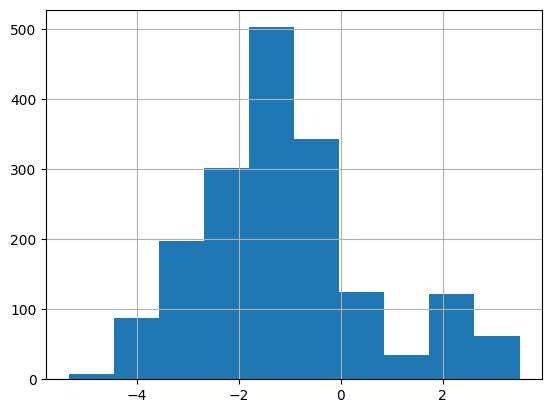

In [48]:
clt_df['AvgTone'].hist()

<Axes: >

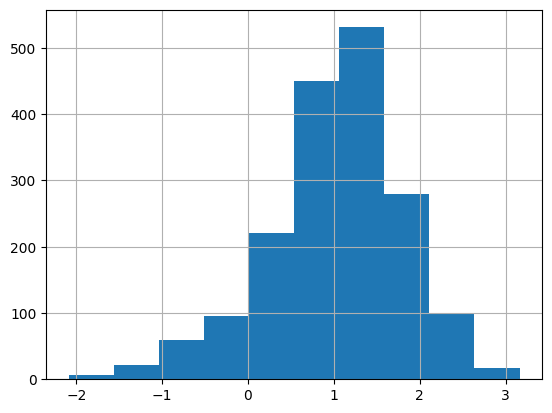

In [49]:
clt_df['GoldsteinScale'].hist()

In [50]:
# weighted tone and number of articles have a moderate correlation
# the product of the number of articles and the tone of each article has a moderate correlation with the number of articles

tone_vol = smf.ols(formula='abs(WeightedTone) ~ NumArticles',data=clt_df)
tone_vol_res = tone_vol.fit()
tone_vol_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      abs(WeightedTone)   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     8348.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        23:19:56   Log-Likelihood:                -29027.
No. Observations:                1779   AIC:                         5.806e+04
Df Residuals:                    1777   BIC:                         5.807e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.916e+04   7.68e+04      0.510      0.610   -1.12e+05     1.9e+05
NumArticles     2.5780      0.028     91.370      0.000       2.523       2.633
==============================================================================
Omnibus:                     1501.752   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           241211.892
Skew:                           3.216   Prob(JB):                         0.00
Kurtosis:                      59.681   Cond. No.                     2.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
country = smf.ols(formula='DollarAmount ~ Country + NumArticles',data=clt_df)
country_res = country.fit()

In [135]:
country_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DollarAmount   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     13.60
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          1.31e-225
Time:                        00:47:31   Log-Likelihood:                -39267.
No. Observations:                1779   AIC:                         7.892e+04
Df Residuals:                    1586   BIC:                         7.998e+04
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -3.25e+06   4.94e+08     -0.007      0.995   -9.72e+08    9.66e+08
Country[T.AFG]  9.374e+09   5.93e+08     15.819      0.000    8.21e+09    1.05e+10
Country[T.AGO]  1.102e+08   5.84e+08      0.189      0.850   -1.04e+09    1.26e+09
Country[T.AIA] -4.816e+05   8.56e+08     -0.001      1.000   -1.68e+09    1.68e+09
Country[T.ALB]  2.547e+07   5.84e+08      0.044      0.965   -1.12e+09    1.17e+09
Country[T.ARE] -3.035e+08   5.85e+08     -0.519      0.604   -1.45e+09    8.44e+08
Country[T.ARG] -1.064e+08   5.85e+08     -0.182      0.856   -1.25e+09    1.04e+09
Country[T.ARM] -6.432e+07   5.85e+08     -0.110      0.912   -1.21e+09    1.08e+09
Country[T.ATG] -6.371e+06   5.94e+08     -0.011      0.991   -1.17e+09    1.16e+09
Country[T.AUS] -3.442e+09   7.36e+08     -4.674      0.000   -4.89e+09      -2e+09
Country[T.AUT] -2.098e+08   6.63e+08     -0.316      0.752   -1.51e+09    1.09e+09
Country[T.AZE] -1.012e+08   5.85e+08     -0.173      0.863   -1.25e+09    1.05e+09
Country[T.BDI]  1.488e+08   5.84e+08      0.255      0.799   -9.98e+08     1.3e+09
Country[T.BEL]  -3.26e+08   6.38e+08     -0.511      0.610   -1.58e+09    9.26e+08
Country[T.BEN]  2.332e+08   5.84e+08      0.399      0.690   -9.13e+08    1.38e+09
Country[T.BFA]  2.688e+08   5.84e+08      0.460      0.646   -8.78e+08    1.42e+09
Country[T.BGD]  5.603e+08   5.85e+08      0.957      0.338   -5.88e+08    1.71e+09
Country[T.BGR]  1.038e+07   5.85e+08      0.018      0.986   -1.14e+09    1.16e+09
Country[T.BHR] -7.936e+07   5.85e+08     -0.136      0.892   -1.23e+09    1.07e+09
Country[T.BHS] -5.061e+07   5.84e+08     -0.087      0.931    -1.2e+09     1.1e+09
Country[T.BLR] -8.364e+07   5.85e+08     -0.143      0.886   -1.23e+09    1.06e+09
Country[T.BLZ] -1.911e+06   5.84e+08     -0.003      0.997   -1.15e+09    1.14e+09
Country[T.BMU] -2.062e+07    1.1e+09     -0.019      0.985   -2.19e+09    2.15e+09
Country[T.BOL] -1.697e+07   5.84e+08     -0.029      0.977   -1.16e+09    1.13e+09
Country[T.BRA] -1.955e+08   5.85e+08     -0.334      0.738   -1.34e+09    9.52e+08
Country[T.BRB] -1.429e+07   5.84e+08     -0.024      0.980   -1.16e+09    1.13e+09
Country[T.BRN] -4.041e+07   6.99e+08     -0.058      0.954   -1.41e+09    1.33e+09
Country[T.BTN] -1.678e+07   5.84e+08     -0.029      0.977   -1.16e+09    1.13e+09
Country[T.BWA]  9.593e+07   5.84e+08      0.164      0.870   -1.05e+09    1.24e+09
Country[T.CAF]  2.283e+08   5.84e+08      0.391      0.696   -9.18e+08    1.37e+09
Country[T.CAN] -2.351e+09   6.26e+08     -3.758      0.000   -3.58e+09   -1.12e+09
Country[T.CHE] -3.884e+08   6.64e+08     -0.585      0.558   -1.69e+09    9.13e+08
Country[T.CHL] -1.016e+08   5.85e+08     -0.174      0.862   -1.25e+09    1.04e+09
Country[T.CHN] -2.951e+09   6.49e+08     -4.549      0.000   -4.22e+09   -1.68e+09
Country[T.CI

In [84]:
model = smf.ols("DollarAmount ~ Country + NumArticles", logx = True, data=sub_df)

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['logx']
  warnings.warn(msg, ValueWarning)


In [88]:
result = model.fit()

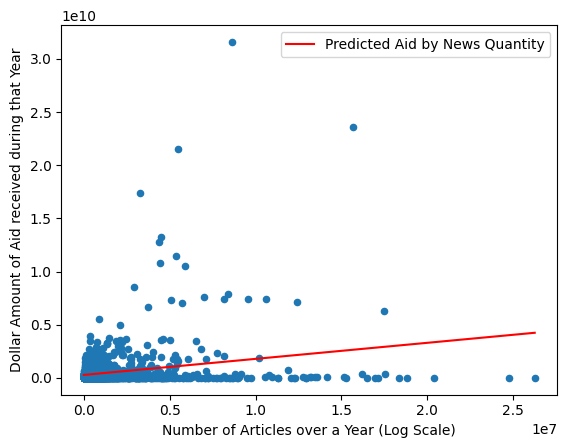

In [97]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
sub_df.plot(x="NumArticles", y="DollarAmount", kind='scatter')

# Fit an OLS model
model = smf.ols("DollarAmount ~ NumArticles", data=sub_df)
result = model.fit()
# Generate predictions
num_articles = np.linspace(sub_df["NumArticles"].min(), sub_df["NumArticles"].max(), 100)
predicted = result.predict({"NumArticles": num_articles})

# Plot the regression line
plt.plot(num_articles, predicted, color='red', label='Predicted Aid by News Quantity')
plt.legend()
plt.xlabel("Number of Articles over a Year (Log Scale)")
plt.ylabel("Dollar Amount of Aid received during that Year")
plt.show()

In [53]:
sample_df = sub_df[(sub_df['Country'] == 'UKR') | (sub_df['Country'] == 'ISR') | (sub_df['Country'] == 'IND') | (sub_df['Country'] == 'MOZ') | (sub_df['Country'] == 'ESP')]

In [139]:
samp_country = smf.ols(formula='DollarAmount ~ Country + NumArticles',data=sub_df)
samp_country_res = samp_country.fit()

In [140]:
samp_country_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DollarAmount   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     13.60
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          1.31e-225
Time:                        00:47:59   Log-Likelihood:                -39267.
No. Observations:                1779   AIC:                         7.892e+04
Df Residuals:                    1586   BIC:                         7.998e+04
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -3.25e+06   4.94e+08     -0.007      0.995   -9.72e+08    9.66e+08
Country[T.AFG]  9.374e+09   5.93e+08     15.819      0.000    8.21e+09    1.05e+10
Country[T.AGO]  1.102e+08   5.84e+08      0.189      0.850   -1.04e+09    1.26e+09
Country[T.AIA] -4.816e+05   8.56e+08     -0.001      1.000   -1.68e+09    1.68e+09
Country[T.ALB]  2.547e+07   5.84e+08      0.044      0.965   -1.12e+09    1.17e+09
Country[T.ARE] -3.035e+08   5.85e+08     -0.519      0.604   -1.45e+09    8.44e+08
Country[T.ARG] -1.064e+08   5.85e+08     -0.182      0.856   -1.25e+09    1.04e+09
Country[T.ARM] -6.432e+07   5.85e+08     -0.110      0.912   -1.21e+09    1.08e+09
Country[T.ATG] -6.371e+06   5.94e+08     -0.011      0.991   -1.17e+09    1.16e+09
Country[T.AUS] -3.442e+09   7.36e+08     -4.674      0.000   -4.89e+09      -2e+09
Country[T.AUT] -2.098e+08   6.63e+08     -0.316      0.752   -1.51e+09    1.09e+09
Country[T.AZE] -1.012e+08   5.85e+08     -0.173      0.863   -1.25e+09    1.05e+09
Country[T.BDI]  1.488e+08   5.84e+08      0.255      0.799   -9.98e+08     1.3e+09
Country[T.BEL]  -3.26e+08   6.38e+08     -0.511      0.610   -1.58e+09    9.26e+08
Country[T.BEN]  2.332e+08   5.84e+08      0.399      0.690   -9.13e+08    1.38e+09
Country[T.BFA]  2.688e+08   5.84e+08      0.460      0.646   -8.78e+08    1.42e+09
Country[T.BGD]  5.603e+08   5.85e+08      0.957      0.338   -5.88e+08    1.71e+09
Country[T.BGR]  1.038e+07   5.85e+08      0.018      0.986   -1.14e+09    1.16e+09
Country[T.BHR] -7.936e+07   5.85e+08     -0.136      0.892   -1.23e+09    1.07e+09
Country[T.BHS] -5.061e+07   5.84e+08     -0.087      0.931    -1.2e+09     1.1e+09
Country[T.BLR] -8.364e+07   5.85e+08     -0.143      0.886   -1.23e+09    1.06e+09
Country[T.BLZ] -1.911e+06   5.84e+08     -0.003      0.997   -1.15e+09    1.14e+09
Country[T.BMU] -2.062e+07    1.1e+09     -0.019      0.985   -2.19e+09    2.15e+09
Country[T.BOL] -1.697e+07   5.84e+08     -0.029      0.977   -1.16e+09    1.13e+09
Country[T.BRA] -1.955e+08   5.85e+08     -0.334      0.738   -1.34e+09    9.52e+08
Country[T.BRB] -1.429e+07   5.84e+08     -0.024      0.980   -1.16e+09    1.13e+09
Country[T.BRN] -4.041e+07   6.99e+08     -0.058      0.954   -1.41e+09    1.33e+09
Country[T.BTN] -1.678e+07   5.84e+08     -0.029      0.977   -1.16e+09    1.13e+09
Country[T.BWA]  9.593e+07   5.84e+08      0.164      0.870   -1.05e+09    1.24e+09
Country[T.CAF]  2.283e+08   5.84e+08      0.391      0.696   -9.18e+08    1.37e+09
Country[T.CAN] -2.351e+09   6.26e+08     -3.758      0.000   -3.58e+09   -1.12e+09
Country[T.CHE] -3.884e+08   6.64e+08     -0.585      0.558   -1.69e+09    9.13e+08
Country[T.CHL] -1.016e+08   5.85e+08     -0.174      0.862   -1.25e+09    1.04e+09
Country[T.CHN] -2.951e+09   6.49e+08     -4.549      0.000   -4.22e+09   -1.68e+09
Country[T.CI

In [70]:
sample_df = sample_df.reset_index()

In [71]:
len(sample_df)

50

In [72]:
sample_df

,level_0,index,Year,AvgTone,WeightedTone,GoldsteinScale,WeightedGoldstein,NumArticles,Country,Constant Dollar Amount,DollarAmount
0,0,136,2016,-2.395561,-1.567885e+07,-0.023730,8.185882e+05,6589130,IND,376023619,376023619
1,1,142,2018,-3.219586,-5.639881e+07,-0.639556,-2.314428e+07,12424775,ISR,7105222635,7105222635
2,2,152,2018,-2.990174,-6.468122e+06,0.034469,-6.871144e+05,1741012,UKR,1252213785,1252213785
3,3,158,2017,-2.081976,-1.272169e+07,0.258987,-1.827443e+06,3605615,ESP,310164,310164
4,4,199,2015,-1.021340,-4.692498e+06,0.709989,1.385584e+06,2418348,ESP,456490,456490
5,5,218,2019,-1.514565,-5.000991e+06,0.857517,7.545994e+05,1924728,ESP,209102,209102
6,6,241,2016,-1.708490,-5.530613e+05,0.784484,2.184771e+05,278171,MOZ,1107548197,1107548197
7,7,243,2018,-2.405109,-1.246034e+07,-0.112022,-3.371575e+05,4956295,IND,312009517,312009517
8,8,248,2015,-1.410667,-4.644660e+05,0.753741,4.934410e+04,202401,MOZ,813486292,813486292
9,9,321,2015,-2.923489,-3.431827e+07,-0.724135,-1.130063e+07,8418813,ISR,7906387007,7906387007


In [132]:
samp_country = smf.ols(formula='DollarAmount ~ Country + NumArticles',data=sub_df)
samp_country_res = samp_country.fit()

In [133]:
samp_country_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DollarAmount   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     13.60
Date:                Tue, 07 May 2024   Prob (F-statistic):          1.31e-225
Time:                        23:46:22   Log-Likelihood:                -39267.
No. Observations:                1779   AIC:                         7.892e+04
Df Residuals:                    1586   BIC:                         7.998e+04
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -3.25e+06   4.94e+08     -0.007      0.995   -9.72e+08    9.66e+08
Country[T.AFG]  9.374e+09   5.93e+08     15.819      0.000    8.21e+09    1.05e+10
Country[T.AGO]  1.102e+08   5.84e+08      0.189      0.850   -1.04e+09    1.26e+09
Country[T.AIA] -4.816e+05   8.56e+08     -0.001      1.000   -1.68e+09    1.68e+09
Country[T.ALB]  2.547e+07   5.84e+08      0.044      0.965   -1.12e+09    1.17e+09
Country[T.ARE] -3.035e+08   5.85e+08     -0.519      0.604   -1.45e+09    8.44e+08
Country[T.ARG] -1.064e+08   5.85e+08     -0.182      0.856   -1.25e+09    1.04e+09
Country[T.ARM] -6.432e+07   5.85e+08     -0.110      0.912   -1.21e+09    1.08e+09
Country[T.ATG] -6.371e+06   5.94e+08     -0.011      0.991   -1.17e+09    1.16e+09
Country[T.AUS] -3.442e+09   7.36e+08     -4.674      0.000   -4.89e+09      -2e+09
Country[T.AUT] -2.098e+08   6.63e+08     -0.316      0.752   -1.51e+09    1.09e+09
Country[T.AZE] -1.012e+08   5.85e+08     -0.173      0.863   -1.25e+09    1.05e+09
Country[T.BDI]  1.488e+08   5.84e+08      0.255      0.799   -9.98e+08     1.3e+09
Country[T.BEL]  -3.26e+08   6.38e+08     -0.511      0.610   -1.58e+09    9.26e+08
Country[T.BEN]  2.332e+08   5.84e+08      0.399      0.690   -9.13e+08    1.38e+09
Country[T.BFA]  2.688e+08   5.84e+08      0.460      0.646   -8.78e+08    1.42e+09
Country[T.BGD]  5.603e+08   5.85e+08      0.957      0.338   -5.88e+08    1.71e+09
Country[T.BGR]  1.038e+07   5.85e+08      0.018      0.986   -1.14e+09    1.16e+09
Country[T.BHR] -7.936e+07   5.85e+08     -0.136      0.892   -1.23e+09    1.07e+09
Country[T.BHS] -5.061e+07   5.84e+08     -0.087      0.931    -1.2e+09     1.1e+09
Country[T.BLR] -8.364e+07   5.85e+08     -0.143      0.886   -1.23e+09    1.06e+09
Country[T.BLZ] -1.911e+06   5.84e+08     -0.003      0.997   -1.15e+09    1.14e+09
Country[T.BMU] -2.062e+07    1.1e+09     -0.019      0.985   -2.19e+09    2.15e+09
Country[T.BOL] -1.697e+07   5.84e+08     -0.029      0.977   -1.16e+09    1.13e+09
Country[T.BRA] -1.955e+08   5.85e+08     -0.334      0.738   -1.34e+09    9.52e+08
Country[T.BRB] -1.429e+07   5.84e+08     -0.024      0.980   -1.16e+09    1.13e+09
Country[T.BRN] -4.041e+07   6.99e+08     -0.058      0.954   -1.41e+09    1.33e+09
Country[T.BTN] -1.678e+07   5.84e+08     -0.029      0.977   -1.16e+09    1.13e+09
Country[T.BWA]  9.593e+07   5.84e+08      0.164      0.870   -1.05e+09    1.24e+09
Country[T.CAF]  2.283e+08   5.84e+08      0.391      0.696   -9.18e+08    1.37e+09
Country[T.CAN] -2.351e+09   6.26e+08     -3.758      0.000   -3.58e+09   -1.12e+09
Country[T.CHE] -3.884e+08   6.64e+08     -0.585      0.558   -1.69e+09    9.13e+08
Country[T.CHL] -1.016e+08   5.85e+08     -0.174      0.862   -1.25e+09    1.04e+09
Country[T.CHN] -2.951e+09   6.49e+08     -4.549      0.000   -4.22e+09   -1.68e+09
Country[T.CI